# dataset

In [39]:
import xmltodict
import os

In [ ]:
path = 'VOC2007/Annotations/'

In [64]:
xml_file_list = os.listdir(path)
xml_to_list = list()

In [87]:
for i in xml_file_list:
    with open(path+'/'+i) as f:
        data = f.read()
        dic_data = xmltodict.parse(data)
        filename = dic_data['annotation']['filename']
        width = int(dic_data['annotation']['size']['width'])
        height = int(dic_data['annotation']['size']['height'])
        objects = dic_data['annotation']['object']
        if (type(objects) == list):
            for i in objects:
                name = i['name']
                bnb = i['bndbox']
                xmin = int(bnb['xmin'])
                ymin = int(bnb['ymin'])
                xmax = int(bnb['xmax'])
                ymax = int(bnb['ymax'])
                value = (filename, width, height, name, xmin,ymin,xmax,ymax)
                xml_to_list.append(value)
        else:
            name = objects['name']
            bnb = objects['bndbox']
            xmin = int(bnb['xmin'])
            ymin = int(bnb['ymin'])
            xmax = int(bnb['xmax'])
            ymax = int(bnb['ymax'])
            value = (filename, width, height, name, xmin,ymin,xmax,ymax)
            xml_to_list.append(value)

In [90]:
column_name = ['filename', 'width', 'height', 'name', 'xmin', 'ymin' ,'xmax','ymax']

In [343]:
import pandas as pd

In [344]:
data = pd.DataFrame(xml_to_list, columns=column_name)

In [345]:
data.name.value_counts()

person         5447
car            1644
chair          1437
bottle          634
pottedplant     625
bird            599
dog             538
sofa            425
bicycle         418
horse           406
boat            398
motorbike       390
cat             389
tvmonitor       367
cow             356
sheep           353
aeroplane       331
train           328
diningtable     310
bus             272
Name: name, dtype: int64

In [346]:
bird_and_dog = data[(data.name=='bird') | (data.name=='dog') ]

In [347]:
bird_and_dog

,filename,width,height,name,xmin,ymin,xmax,ymax
22,000021.jpg,336,500,dog,1,235,182,388
50,000036.jpg,332,500,dog,27,79,319,344
59,000046.jpg,332,500,bird,211,234,317,366
62,000048.jpg,375,500,bird,58,107,291,465
90,000063.jpg,500,375,dog,123,115,379,275
...,...,...,...,...,...,...,...,...
15581,009908.jpg,500,375,bird,111,201,131,256
15590,009918.jpg,500,333,dog,118,123,287,333
15617,009940.jpg,500,375,bird,218,114,387,375
15618,009940.jpg,500,375,bird,135,133,365,375


In [348]:
resize = 224

In [349]:
import numpy as np

In [350]:
bird_and_dog['xmin_resize'] = bird_and_dog.apply(lambda x: np.round(x['xmin'] * (224 / x['width'])).astype('int32'), axis=1)
bird_and_dog['xmax_resize'] = bird_and_dog.apply(lambda x: np.round(x['xmax'] * (224 / x['width'])).astype('int32'), axis=1)
bird_and_dog['ymin_resize'] = bird_and_dog.apply(lambda x: np.round(x['ymin'] * (224 / x['height'])).astype('int32'), axis=1)
bird_and_dog['ymax_resize'] = bird_and_dog.apply(lambda x: np.round(x['ymax'] * (224 / x['height'])).astype('int32'), axis=1)

C:\Users\sunde\AppData\Local\Temp\ipykernel_13376\1788773196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bird_and_dog['xmin_resize'] = bird_and_dog.apply(lambda x: np.round(x['xmin'] * (224 / x['width'])).astype('int32'), axis=1)
C:\Users\sunde\AppData\Local\Temp\ipykernel_13376\1788773196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bird_and_dog['xmax_resize'] = bird_and_dog.apply(lambda x: np.round(x['xmax'] * (224 / x['width'])).astype('int32'), axis=1)
C:\Users\sunde\AppData\Local\Temp\ip

In [352]:
bird_and_dog_single = bird_and_dog[~bird_and_dog.filename.duplicated()]

# 단일 객체 Detection 모델

In [353]:
bird_and_dog_single['label'] = bird_and_dog_single.name.map({'dog':0, 'bird':1})

C:\Users\sunde\AppData\Local\Temp\ipykernel_13376\2533060716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bird_and_dog_single['label'] = bird_and_dog_single.name.map({'dog':0, 'bird':1})


In [354]:
bird_and_dog_single

,filename,width,height,name,xmin,ymin,xmax,ymax,xmin_resize,xmax_resize,ymin_resize,ymax_resize,label
22,000021.jpg,336,500,dog,1,235,182,388,1,121,105,174,0
50,000036.jpg,332,500,dog,27,79,319,344,18,215,35,154,0
59,000046.jpg,332,500,bird,211,234,317,366,142,214,105,164,1
62,000048.jpg,375,500,bird,58,107,291,465,35,174,48,208,1
90,000063.jpg,500,375,dog,123,115,379,275,55,170,69,164,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15515,009870.jpg,500,340,dog,272,70,466,290,122,209,46,191,0
15579,009908.jpg,500,375,bird,277,160,317,180,124,142,96,108,1
15590,009918.jpg,500,333,dog,118,123,287,333,53,129,83,224,0
15617,009940.jpg,500,375,bird,218,114,387,375,98,173,68,224,1


In [227]:
import tensorflow as tf

In [367]:
ig = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [369]:
fig = ig.flow_from_dataframe(bird_and_dog_single, 
                             directory='VOC2007/JPEGImages/', 
                             y_col=['xmin_resize','xmax_resize','ymin_resize','ymax_resize', 'label'],
                             class_mode='raw', # multi_output
                             target_size=(224, 224))

Found 756 validated image filenames.


C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 6 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [380]:
def fig2(fig):
    while True:
        (X, y) = next(fig)
        yield X, (y[:, :-1], y[:, -1])

In [386]:
fig3 = fig2(fig)

In [387]:
data_tf = tf.data.Dataset.from_generator(lambda: fig3,
                                        output_types=((tf.float32), (tf.float32, tf.float32)))

In [389]:
next(iter(data_tf))

(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
 array([[[[ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
          [ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
          [ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
          ...,
          [ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
          [ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
          [ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02]],
 
         [[ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
          [ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
          [ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
          ...,
          [ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
          [ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
          [ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02]],
 
         [[ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
          [ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
          [ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
    

# model

In [272]:
vgg = tf.keras.applications.VGG16(include_top=False, input_shape=(224,224,3))
vgg.trainable = False

In [363]:
input_ = vgg.input
x = vgg(input_)
x = tf.keras.layers.GlobalAveragePooling2D()(x) # GAP

reg = tf.keras.layers.Dense(64, activation='relu')(x) 
reg = tf.keras.layers.Dense(4, name='reg')(reg) 

cla = tf.keras.layers.Dense(64, activation='relu')(x)
cla = tf.keras.layers.Dense(1, activation='sigmoid', name='cla')(cla)

In [364]:
model = tf.keras.Model(input_, [reg, cla])

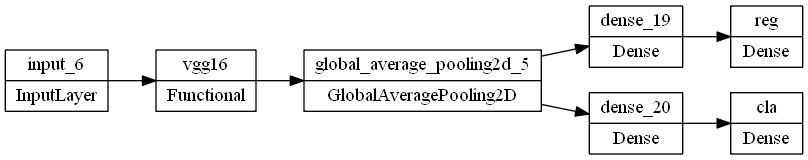

In [366]:
tf.keras.utils.plot_model(model, rankdir='LR')

In [358]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_6[0][0]']                
                                                                                                  
 global_average_pooling2d_2 (Gl  (None, 512)         0           ['vgg16[1][0]']                  
 obalAveragePooling2D)                                                                            
                                                                                            

In [390]:
model.compile(loss= {'reg': tf.keras.losses.mean_squared_error ,
                     'cla': tf.keras.losses.binary_crossentropy}) # MSE

In [392]:
history = model.fit(fig3, epochs=40)

Epoch 1/40
    293/Unknown - 51s 173ms/step - loss: 1370.0103 - reg_loss: 1369.9977 - cla_loss: 0.0131

KeyboardInterrupt: 

In [393]:
im = tf.keras.preprocessing.image.load_img('VOC2007/JPEGImages/000064.jpg')

In [394]:
im = im.resize((224,224))

In [395]:
im_numpy = tf.keras.preprocessing.image.img_to_array(im)

In [396]:
im_p = tf.keras.applications.vgg16.preprocess_input(im_numpy)

In [397]:
evalution = im_p[tf.newaxis]

In [398]:
model(evalution)

[<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[ 14.781816, 184.35942 ,  32.41502 , 220.95224 ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>]

In [ ]:
# 이전 모델 5.7056956, 25.06606  , 16.814821 , 18.52686 
# 정답 0	204	10	224